# Segmentation

In this notebook we are going to have a detailed look at the segmentation step of tobac'

In [124]:
import tobac
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Thresholds

In [19]:
data = tobac.testing.make_sample_data_2D_3blobs()
data

<xarray.DataArray 'w' (time: 100, y: 200, x: 100)>
[2000000 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01T12:00:00 ... 2000-01-01T13:39:00
  * y          (y) float64 0.0 1e+03 2e+03 3e+03 ... 1.97e+05 1.98e+05 1.99e+05
  * x          (x) float64 0.0 1e+03 2e+03 3e+03 ... 9.7e+04 9.8e+04 9.9e+04
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...
Attributes:
    units:    m s-1

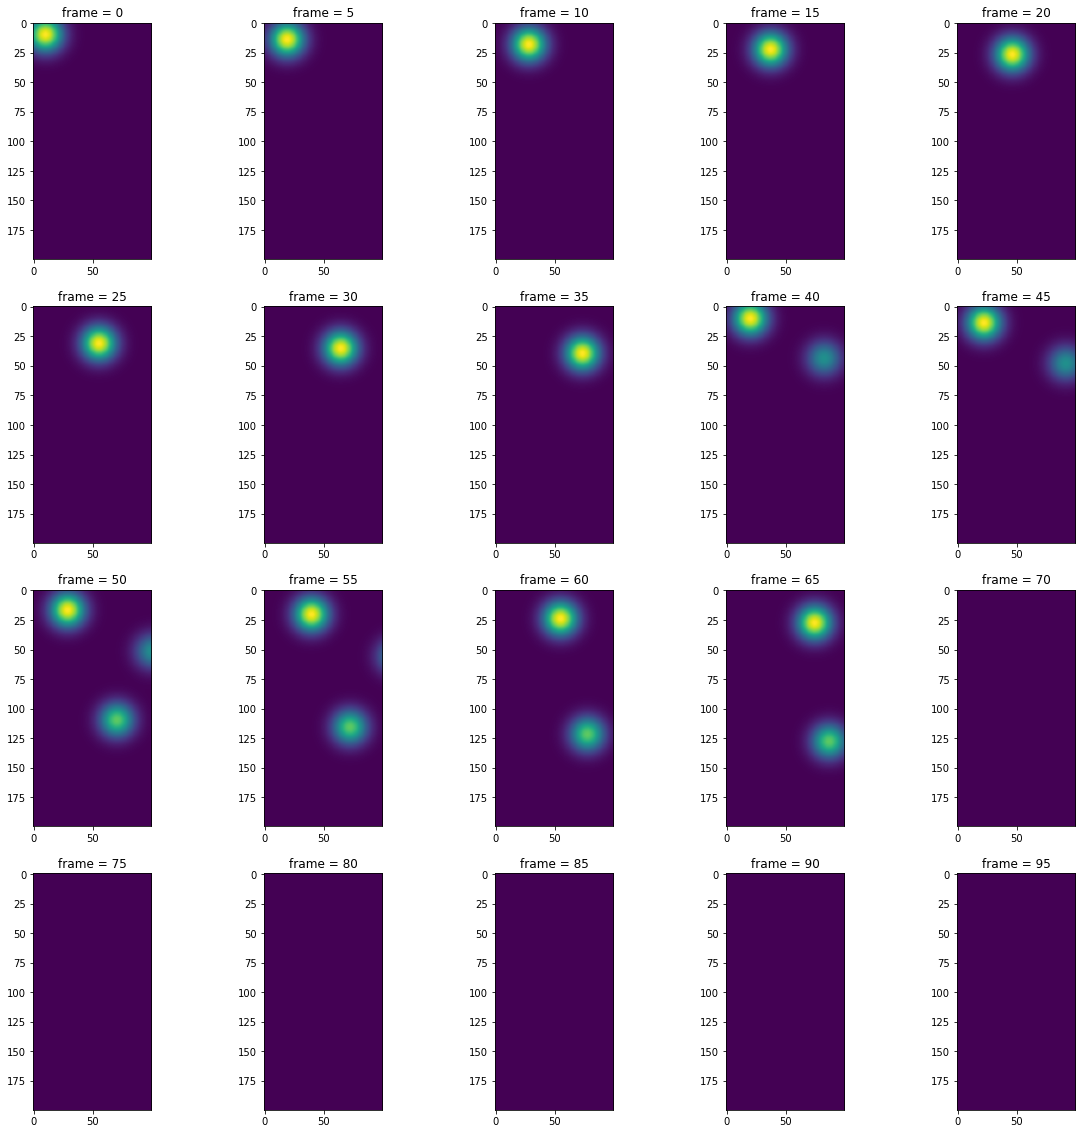

In [20]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize  = (20, 20))
d = 5
for n, axis in enumerate(np.ravel(ax)):
    axis.imshow(data.data[n*d])
    axis.set_title('frame = {}'.format(n*d))

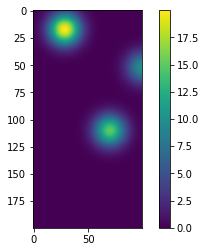

In [21]:
plt.imshow(data.data[50])
plt.colorbar()

In [36]:
dxy, dt = tobac.utils.get_spacings(data)
thresholds = [i for i in range(9, 18)]
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, thresholds)

     frame  idx      hdim_1     hdim_2  num  threshold_value  feature  \
0        0    1   10.000000  10.000000   69                9        1   
1        1    1   10.939394  11.848485   66                9        2   
2        2    1   11.707692  13.661538   65                9        3   
3        3    1   12.569231  15.353846   65                9        4   
4        4    1   13.200000  17.107692   65                9        5   
..     ...  ...         ...        ...  ...              ...      ...   
97      67   23   29.500000  83.000000  104               17       98   
98      68   17  131.761905  93.142857   42               14       99   
99      68   23   30.100000  87.790000  100               17      100   
100     69   17  132.809524  96.071429   42               14      101   
101     69   23   30.931373  92.686275  102               17      102   

                    time              timestr  projection_y_coordinate  \
0    2000-01-01 12:00:00  2000-01-01 12:00:00    

In [37]:
features

<xarray.Dataset>
Dimensions:                  (index: 102)
Coordinates:
  * index                    (index) int64 0 1 2 3 4 5 6 ... 96 97 98 99 100 101
Data variables: (12/13)
    frame                    (index) int64 0 1 2 3 4 5 6 ... 67 67 68 68 69 69
    idx                      (index) int64 1 1 1 1 1 1 1 ... 17 23 17 23 17 23
    hdim_1                   (index) float64 10.0 10.94 11.71 ... 132.8 30.93
    hdim_2                   (index) float64 10.0 11.85 13.66 ... 96.07 92.69
    num                      (index) int64 69 66 65 65 65 ... 104 42 100 42 102
    threshold_value          (index) int64 9 9 9 9 9 9 9 ... 14 17 14 17 14 17
    ...                       ...
    time                     (index) object 2000-01-01 12:00:00 ... 2000-01-0...
    timestr                  (index) object '2000-01-01 12:00:00' ... '2000-0...
    projection_y_coordinate  (index) float64 1e+04 1.094e+04 ... 3.093e+04
    projection_x_coordinate  (index) float64 1e+04 1.185e+04 ... 9.269e+04
    latitude                 (index) object 24.1 24.12 24.14 ... 24.96 24.93
    longitude                (index) object 150.1 150.1 150.1 ... 151.3 150.3

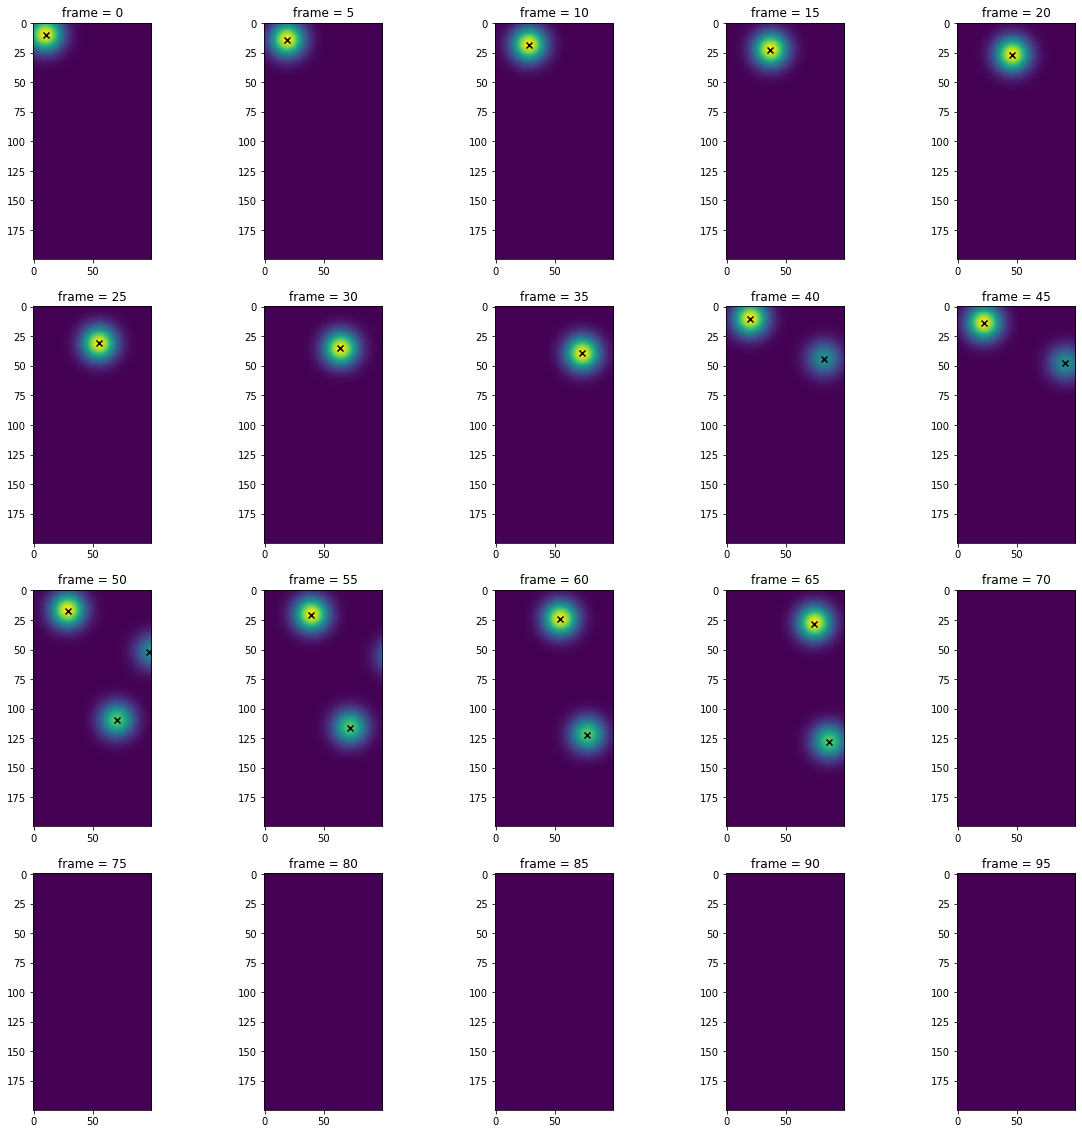

In [38]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize  = (20, 20))
d = 5
for n, axis in enumerate(np.ravel(ax)):
    axis.imshow(data.data[n*d])
    axis.set_title('frame = {}'.format(n*d))
    mask_1 = features['frame'] == n*d
    axis.scatter(features.where(mask_1)['hdim_2'], features.where(mask_1)['hdim_1'], color = 'black', marker = 'x')

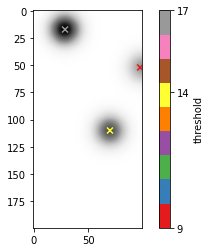

In [39]:
n = 50
mask = features['frame'] == n

plt.imshow(data.data[n], cmap = 'Greys')

plt.scatter(features.where(mask)['hdim_2'], features.where(mask)['hdim_1'], c = features.where(mask)['threshold_value'], marker = 'x', cmap = 'Set1')
plt.colorbar(label = 'threshold', ticks = [9, 14, 17])

## Position

To explore the influence of the position_threshold flag we need an asymmetric dataset. Lets create a simple one by adding two 2d-gausians and add an extra dimension for the time, which is required for working with tobac:

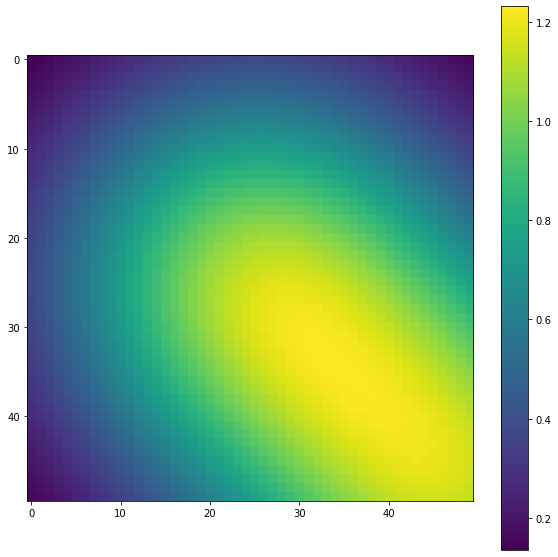

In [287]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
xx, yy = np.meshgrid(x, y)

asymmetric_data = np.expand_dims(np.exp(-(xx**2+yy**2)) + np.exp(-0.95*((1-xx)**2+(1-yy)**2)), axis=0)

plt.figure(figsize=(10,10))
plt.imshow(asymmetric_data[0])
plt.colorbar()

To feed this data into the feature detection we need to convert it into an xarray-DataArray. Before we do that we we select an arbitrary time and date for the single frame of our synthetic field:

In [277]:
import xarray as xr

date = np.datetime64('2022-04-01T00:00', )
assym = xr.DataArray(data=test_data, coords={'time':np.expand_dims(date, axis = 0),'y':y, 'x':x})
assym

<xarray.DataArray (time: 1, y: 50, x: 50)>
array([[[0.13583573, 0.14718557, 0.15895675, ..., 0.18050818,
         0.16893747, 0.15770606],
        [0.14718557, 0.15948715, 0.17224612, ..., 0.1973736 ,
         0.18484836, 0.17268484],
        [0.15895675, 0.17224612, 0.18603043, ..., 0.21523473,
         0.20172207, 0.18859316],
        ...,
        [0.18050818, 0.1973736 , 0.21523473, ..., 1.17252988,
         1.16357329, 1.15196789],
        [0.16893747, 0.18484836, 0.20172207, ..., 1.16357329,
         1.1556465 , 1.14502066],
        [0.15770606, 0.17268484, 0.18859316, ..., 1.15196789,
         1.14502066, 1.13533528]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-04-01
  * y        (y) float64 -1.0 -0.9592 -0.9184 -0.8776 ... 0.9184 0.9592 1.0
  * x        (x) float64 -1.0 -0.9592 -0.9184 -0.8776 ... 0.9184 0.9592 1.0

Since we do not have a dt in this dataset, we can not use the get_spacings-utility this time and need to calculate the spacing manually:

In [288]:
dxy = (assym['x'][1] - assym['x'][0])

Finally, we choose a threshold in the datarange and apply the feature detection with the four position_threshold flags
- 'center'
- 'extreme'
- 'weighted_diff'
- 'weighted_diff'

In [289]:
threshold = 0.8
features_center = tobac.themes.tobac_v1.feature_detection_multithreshold(assym, dxy, threshold, position_threshold='center')
features_extreme = tobac.themes.tobac_v1.feature_detection_multithreshold(assym, dxy, threshold, position_threshold='extreme')
features_diff = tobac.themes.tobac_v1.feature_detection_multithreshold(assym, dxy, threshold, position_threshold='weighted_diff')
features_abs = tobac.themes.tobac_v1.feature_detection_multithreshold(assym, dxy, threshold, position_threshold='weighted_diff')                       

   frame  idx     hdim_1     hdim_2   num  threshold_value  feature  \
0      0    1  31.261404  31.261404  1140              0.8        1   

                  time              timestr         y         x  
0  2022-04-01 00:00:00  2022-04-01 00:00:00  0.275976  0.275976  
['time', 'y', 'x']
   frame  idx  hdim_1  hdim_2   num  threshold_value  feature  \
0      0    1      34      34  1140              0.8        1   

                  time              timestr         y         x  
0  2022-04-01 00:00:00  2022-04-01 00:00:00  0.387755  0.387755  
['time', 'y', 'x']
   frame  idx     hdim_1     hdim_2   num  threshold_value  feature  \
0      0    1  33.360379  33.360379  1140              0.8        1   

                  time              timestr         y         x  
0  2022-04-01 00:00:00  2022-04-01 00:00:00  0.361648  0.361648  
['time', 'y', 'x']
   frame  idx     hdim_1     hdim_2   num  threshold_value  feature  \
0      0    1  33.360379  33.360379  1140              0.8 

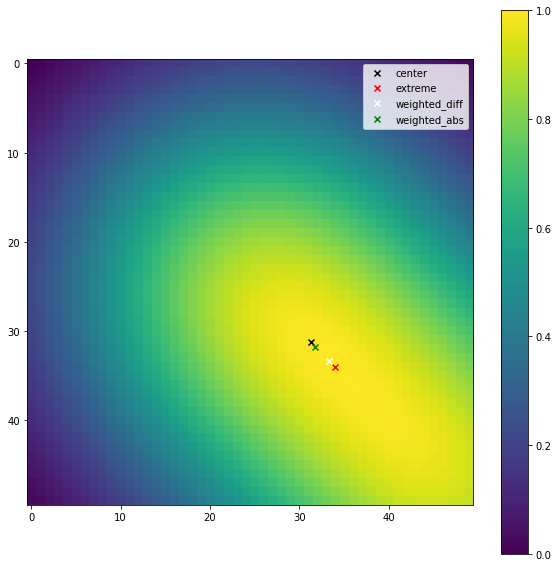

In [284]:
plt.figure(figsize = (10, 10))
plt.imshow(assym[0])
plt.scatter(features_center['hdim_2'], features_center['hdim_1'], color = 'black', marker = 'x', label = 'center')
plt.scatter(features_extreme['hdim_2'], features_extreme['hdim_1'], color = 'red', marker = 'x', label = 'extreme')
plt.scatter(features_diff['hdim_2'], features_diff['hdim_1'], color = 'white', marker = 'x', label = 'weighted_diff')
plt.scatter(features_abs['hdim_2'], features_abs['hdim_1'], color = 'green', marker = 'x', label = 'weighted_abs')
plt.colorbar()
plt.legend()

- extreme: highest value within the area above the threshold
- center : geometrical center of the area above the threshold
- weighted: mixture of both ???

In [270]:
features_center

<xarray.Dataset>
Dimensions:          (index: 1)
Coordinates:
  * index            (index) int64 0
Data variables:
    frame            (index) int64 0
    idx              (index) int64 1
    hdim_1           (index) float64 28.8
    hdim_2           (index) float64 28.8
    num              (index) int64 1661
    threshold_value  (index) float64 0.7
    feature          (index) int64 1
    time             (index) object 2022-04-01 00:00:00
    timestr          (index) object '2022-04-01 00:00:00'
    y                (index) float64 0.1756
    x                (index) float64 0.1756